In [104]:
#Import packages and dataset
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("energydata_complete.csv", header = 0)

#Adding the NSM column
dt = pd.to_datetime(df["date"])
NSM = (dt.dt.hour * 3600) + (dt.dt.minute * 60) + dt.dt.second + (dt.dt.microsecond / 1000000.0)
df.insert(3, 'NSM', NSM)

In [105]:
weekday = pd.DataFrame(columns=['Weekday'])
row = 0
for row in range(dt.shape[0]):
    weekday.loc[row] = datetime.datetime(dt.dt.year[row], dt.dt.month[row], dt.dt.day[row]).isoweekday()

df.insert(4,'Weekday',weekday)

In [106]:
# --------------------- REMOVE OUTLIERS ---------------------------
#Shewart Chart method. Outliers are specified as values outside of -> mean +- 3* std
outliers = 0

mean = df.iloc[:,1].mean()
std = df.iloc[:,1].std()

for row in range(df.shape[0]):
    if df.at[row, 'Appliances'] > mean + 3 * std:
        df = df.drop([row])
        row -= 1
        outliers += 1
print(outliers, 'rows with outliers have been removed')

540 rows with outliers have been removed


In [107]:
#https://towardsdatascience.com/machine-learning-basics-support-vector-regression-660306ac5226
#1 Importing the lbiraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#2 Import dataset
X = df.iloc[:,2:30].values
y = df.iloc[:,1].values
y = y.reshape(-1, 1)

X_plot = X
y_plot = y

#3 Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))


In [108]:
#4 Training the Support Vector Regression model on the Training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

#5 Training the Support Vector Regression model on the Training set
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train.ravel())

#6 Predicting the Test set Results
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

#7 Comparing the Test Set with Predicted Values
print(pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)), 'Predicted Values':y_pred}))

      Real Values  Predicted Values
0            30.0         39.800664
1           270.0        155.477636
2            60.0         60.555342
3           220.0        143.021730
4            60.0         56.238859
...           ...               ...
4794         90.0        103.160848
4795         60.0         76.594740
4796         70.0         60.729213
4797        210.0        139.404371
4798         30.0         39.108286

[4799 rows x 2 columns]


In [109]:
print('Testing score, R^2 = ', regressor.score(X_test, y_test, sample_weight=None))
print('Training score, R^2 = ', regressor.score(X_train, y_train, sample_weight=None))

Testing score, R^2 =  0.3033717440098136
Training score, R^2 =  0.3227786100649115


In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import learning_curve

Automatically created module for IPython interactive environment


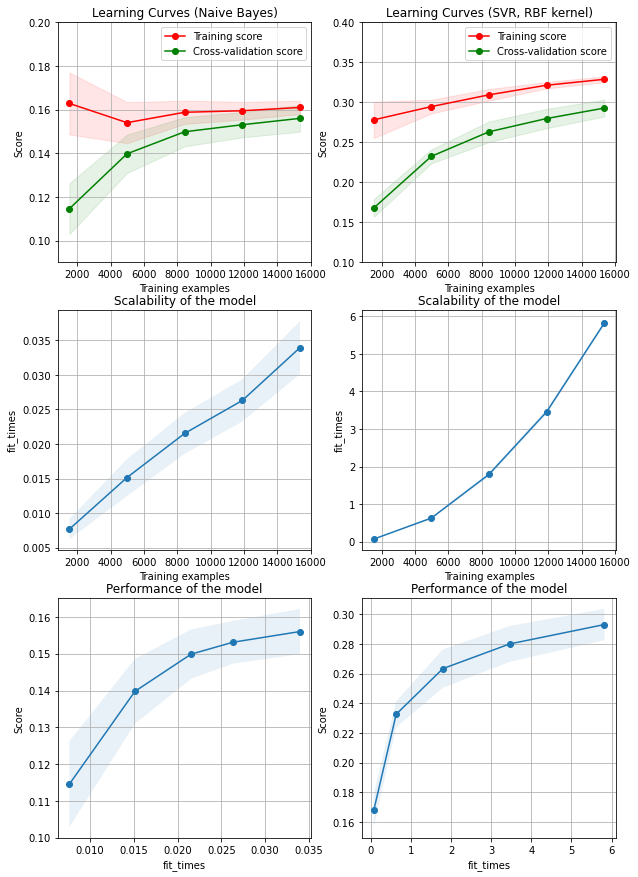

In [111]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_plot, y_plot, axes=axes[:, 0], ylim=(0.09, 0.2),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVR, RBF kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVR(kernel = 'rbf')
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.1, 0.4),
                    cv=cv, n_jobs=4)

plt.show()